In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Participants_Data_GGSH_Solution_Notebook\India_train.csv")
data.head()

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
0,1990,Andhra Pradesh,Srikakulam,0.0,0.0,0,4.05,50.75,75.34,18.87,...,23.32,19.79,15.90,1383.0,NaN,5.79,4.21,41684.0,85.21,67.77
1,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,18.24,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74
2,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,19.69,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95
3,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,NaN,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35
4,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,28.12,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57


<AxesSubplot:>

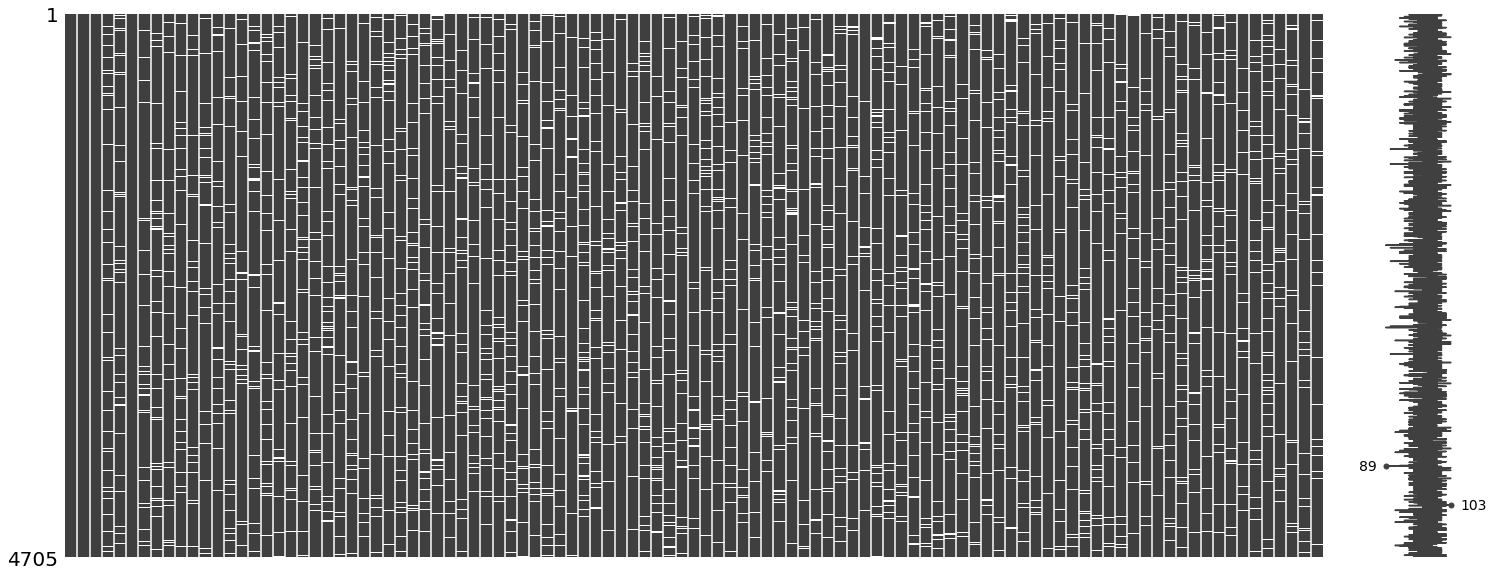

In [3]:
import missingno as msno
msno.matrix(data)

Fill null values with Interpolation

In [4]:
def tofillnull(methods,df2):
    df=df2.copy()
    if(methods=='forward'):
        df=df.interpolate(method='linear',limit_direction='forward')
    else:
        df=df.interpolate(method='linear',limit_direction='backward')
    return df

In [5]:
data_fill_forward=tofillnull('forward',data)
data_fill_backward=tofillnull('backward',data)

In [6]:
data_fill_backward.isnull().sum()

Year                                0
State Name                          0
Dist Name                           0
COTTON AREA (1000 ha)               0
COTTON PRODUCTION (1000 tons)       0
                                   ..
POTASH PER HA OF NCA (Kg per ha)    0
POTASH PER HA OF GCA (Kg per ha)    0
TOTAL CONSUMPTION (tons)            0
TOTAL PER HA OF NCA (Kg per ha)     0
TOTAL PER HA OF GCA (Kg per ha)     0
Length: 103, dtype: int64

In [7]:
fill_data_tech=[data_fill_forward,data_fill_backward]

DOMAIN KNOWLEDGE

Precipitation, 
Temperature minimum and maximum , 
water deficit and actual, Potential,
Nitrogen Consumption, 
Phosphate Consumption,
Potash Consumption, 
Total Consumption TOTAL AREA (1000 ha)
FOREST AREA (1000 ha)
BARREN AND UNCULTIVABLE LAND AREA (1000 ha)
LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha)
CULTIVABLE WASTE LAND AREA (1000 ha)

Cotton is a plant that needs a long frost-free period, a lot of heat and plenty of sunshine. It prefers warm and humid climate. Cotton seeds will have a small germination rate, if the soil temperature is below 60°F (15°C). 

During active growth, the ideal air temperature is 70 to 100°F (21-37°C). Temperatures well above 100°F are not desirable. However, the average cotton plant can survive in temperatures up to 110°F (43°C) for short periods without great damage, but this also depends on the humidity levels. In order to cultivate cotton plants successfully, 

we shall not have frequent rainfalls during the maturing (summer) and during the days of harvest (during autumn).

moderate concentration of nitrogen and phosphorus. The best yields are often achieved in loamy soils that are rich in calcium carbonate. A gentle slope generally helps the water drainage and is sometimes desired.

 Rainfall should be moderate, ranging between 50-75 cm. Cotton plant needs sufficient rainfall in the early stages of growth, but a sunny and dry weather is required after flowering.


 During October, the day temperature should be above 26 degree Celsius which helps the ripening and bursting of cotton balls under the sunny skies. Along growing period of atleast 200 frost free days is also necessary for the plant to mature.

 

In [8]:
data['Year'].values

array([1990, 1990, 1990, ..., 2006, 2006, 2006], dtype=int64)

In [9]:
for col in data.columns:
    print(col)

Year
State Name
Dist Name
COTTON AREA (1000 ha)
COTTON PRODUCTION (1000 tons)
COTTON YIELD (Kg per ha)
JANUARY PERCIPITATION (Millimeters)
FEBRUARY PERCIPITATION (Millimeters)
MARCH PERCIPITATION (Millimeters)
APRIL PERCIPITATION (Millimeters)
MAY PERCIPITATION (Millimeters)
JUNE PERCIPITATION (Millimeters)
JULY PERCIPITATION (Millimeters)
AUGUST PERCIPITATION (Millimeters)
SEPTEMBER PERCIPITATION (Millimeters)
OCTOBER PERCIPITATION (Millimeters)
NOVEMBER PERCIPITATION (Millimeters)
DECEMBER PERCIPITATION (Millimeters)
JANUARY MINIMUM (Centigrate)
FEBRUARY MINIMUM (Centigrate)
MARCH MINIMUM (Centigrate)
APRIL MINIMUM (Centigrate)
MAY MINIMUM (Centigrate)
JUNE MINIMUM (Centigrate)
JULY MINIMUM (Centigrate)
AUGUST MINIMUM (Centigrate)
SEPTEMBER MINIMUM (Centigrate)
OCTOBER MINIMUM (Centigrate)
NOVEMBER MINIMUM (Centigrate)
DECEMBER MINIMUM (Centigrate)
JANUARY MAXIMUM (Centigrate)
FEBRUARY MAXIMUM (Centigrate)
MARCH MAXIMUM (Centigrate)
APRIL MAXIMUM (Centigrate)
MAY MAXIMUM (Centigrate)

In [10]:
data['Year'].value_counts()

1998    279
1997    279
2005    279
2004    279
2003    279
1999    279
2006    279
1994    279
1993    279
1992    279
1996    275
1995    275
2000    275
2001    275
2002    275
1991    270
1990    270
Name: Year, dtype: int64

In [11]:
data['State Name'].value_counts()

Uttar Pradesh       731
Madhya Pradesh      578
Rajasthan           442
Maharashtra         391
Gujarat             289
Karnataka           255
West Bengal         204
Orissa              204
Punjab              170
Himachal Pradesh    170
Kerala              170
Telangana           153
Andhra Pradesh      153
Bihar               153
Tamil Nadu          136
Uttarakhand         136
Assam               135
Haryana             102
Chhattisgarh         85
Jharkhand            48
Name: State Name, dtype: int64

In [12]:
def statewise_yield(df2):
    states=np.unique(df2['State Name'].values)
    df=df2.copy()
    df=df.groupby('State Name')
    figure,axes=plt.subplots(5,4,sharex=True,figsize=(30,15))
    figure.suptitle("Cotton Yield rate in yearwise")
    a=0
    b=0
    for i in states:
        if(b==4):
            a=a+1
            b=0
        data_state=df.get_group(str(i))
        data_state_yr=data_state.groupby('Year').sum()
        sns.lineplot(ax=axes[a,b],data=data_state_yr,x="Year",y='COTTON YIELD (Kg per ha)')
        #sns.lineplot(ax=axes[a,b],data=data_state_yr,x="Year",y='COTTON PRODUCTION (1000 tons)')
        axes[a][b].set_title(i)
        b=b+1

In [13]:
def statewise_production(df2):
    states=np.unique(df2['State Name'].values)
    df=df2.copy()
    df=df.groupby('State Name')
    figure,axes=plt.subplots(5,4,sharex=True,figsize=(30,15))
    figure.suptitle("Cotton Production rate in yearwise")
    a=0
    b=0
    for i in states:
        if(b==4):
            a=a+1
            b=0
        data_state=df.get_group(str(i))
        data_state_yr=data_state.groupby('Year').sum()
        #sns.lineplot(ax=axes[a,b],data=data_state_yr,x="Year",y='COTTON YIELD (Kg per ha)')
        sns.lineplot(ax=axes[a,b],data=data_state_yr,x="Year",y='COTTON PRODUCTION (1000 tons)')
        axes[a][b].set_title(i)
        b=b+1

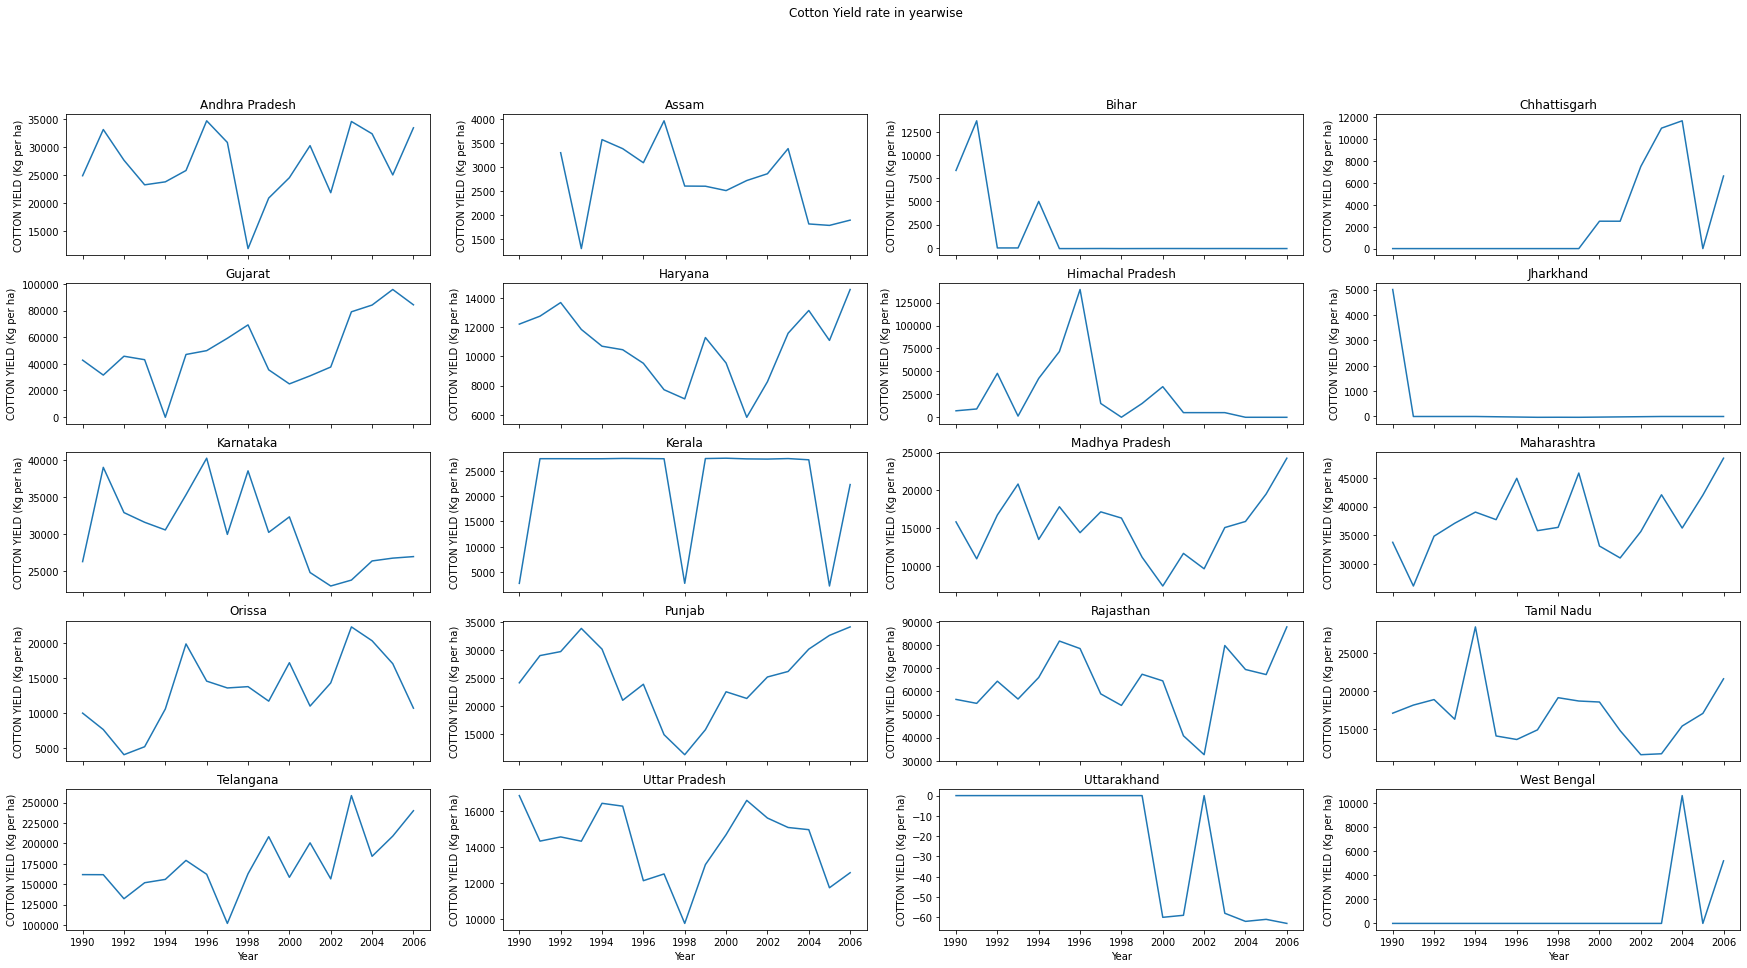

In [14]:
statewise_yield(data_fill_forward)

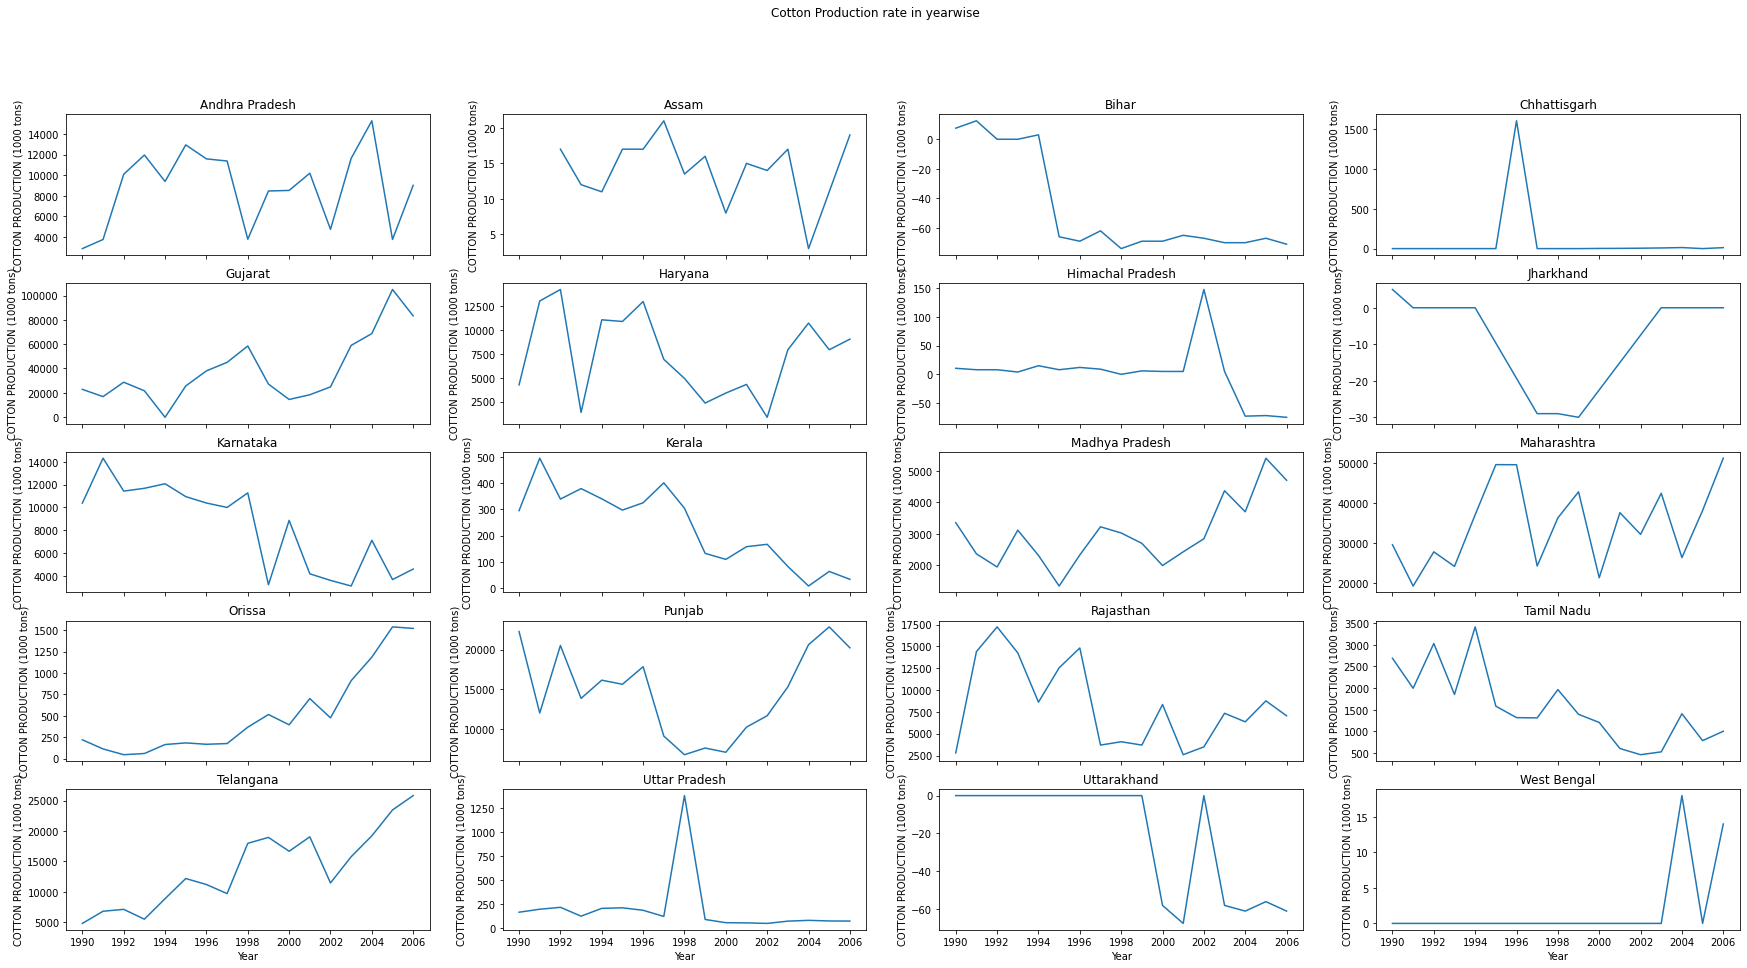

In [15]:
statewise_production(data_fill_forward)

In [16]:
def rainfall_states1998_first6months(states,df):
    for i in states:
        df_state=df.groupby("State Name")
        df_state=df_state.get_group(str(i))
        df_state=df_state.groupby('Year')
        df_state=df_state.mean()
        data_monthwise_01=df_state.iloc[:,[3,4,5,6,7,8]]
        #data_monthwise_02=df_state.iloc[:,[9,10,11,12,13,14]]
        plt.figure(figsize=(20,10))
        plt.title(i)
        sns.lineplot(data=data_monthwise_01)
        plt.show()

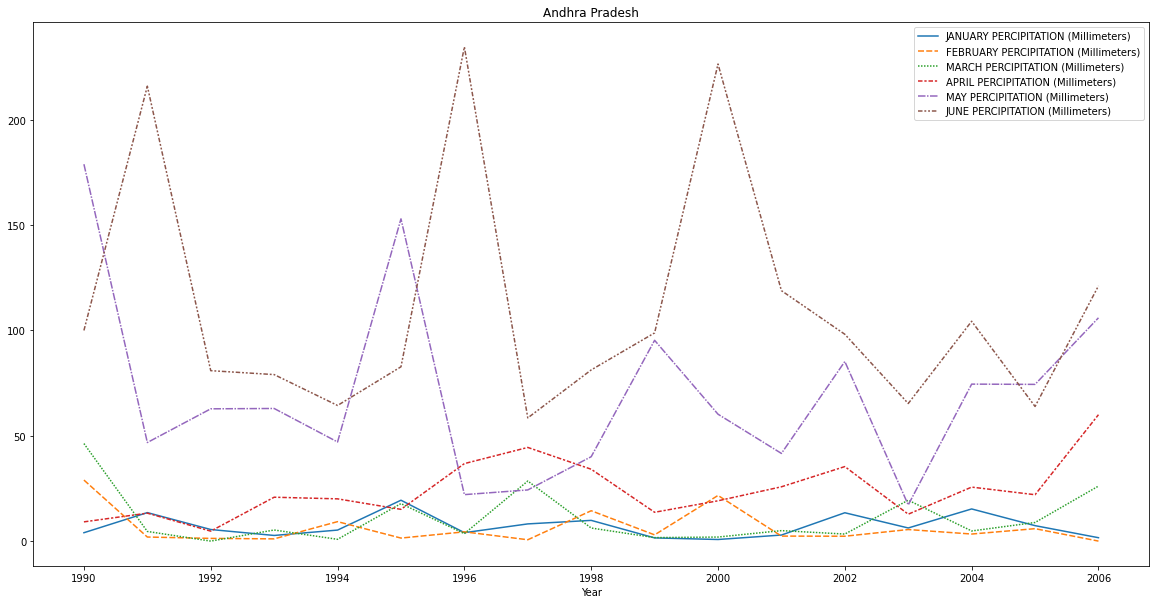

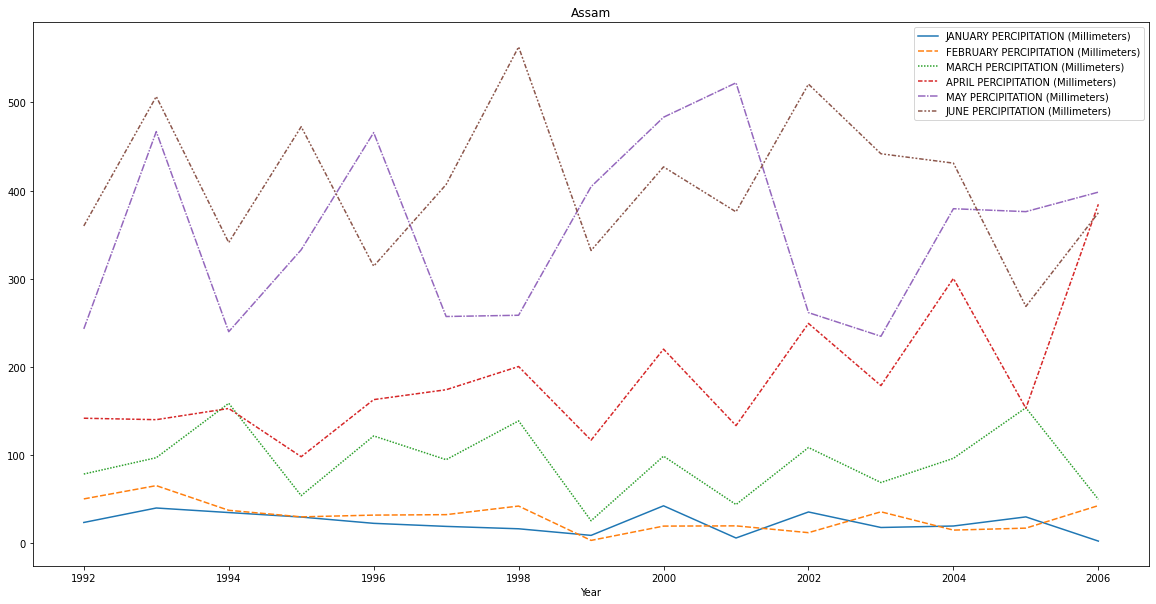

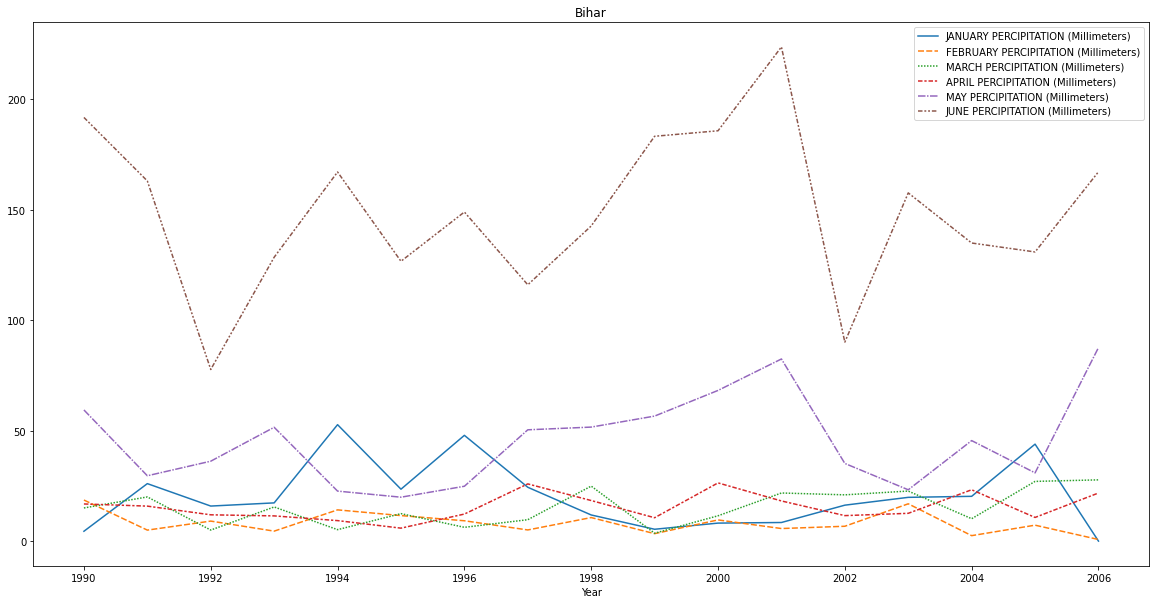

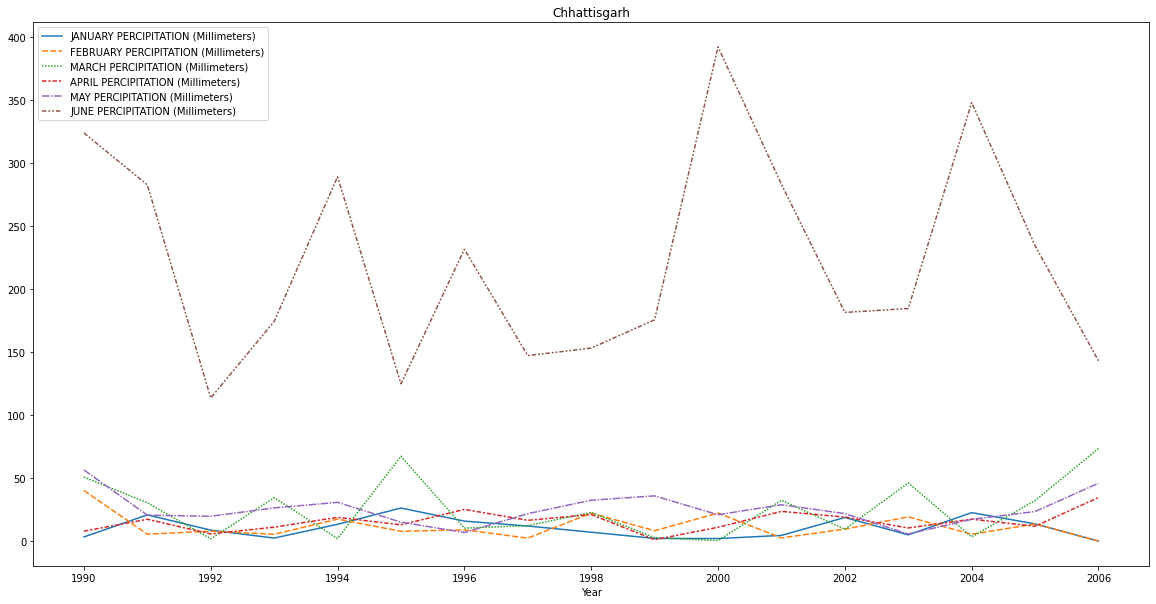

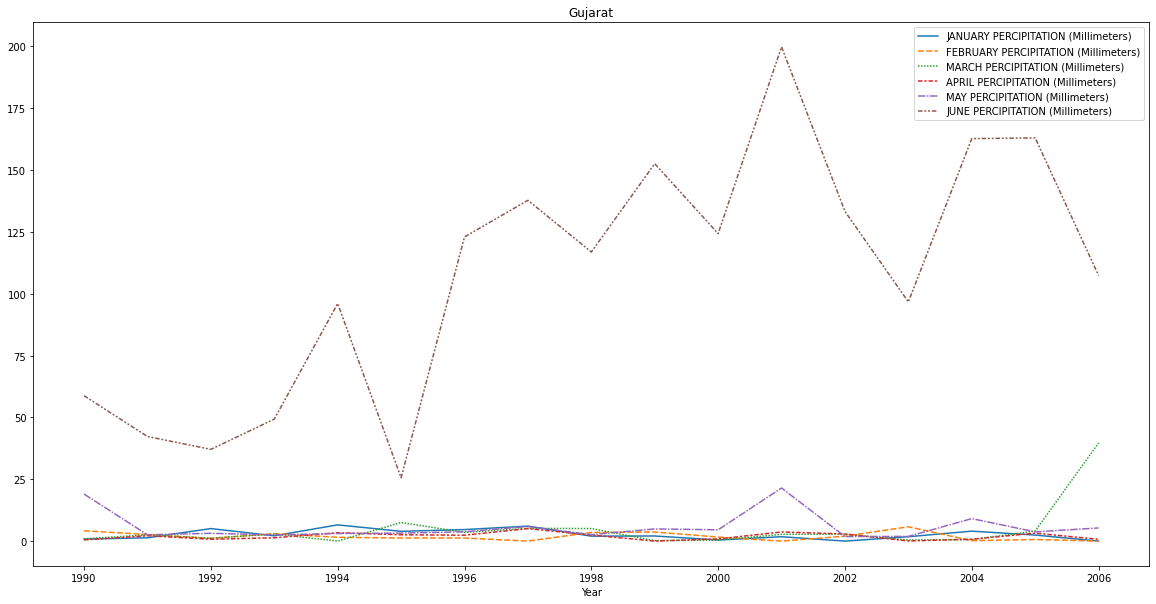

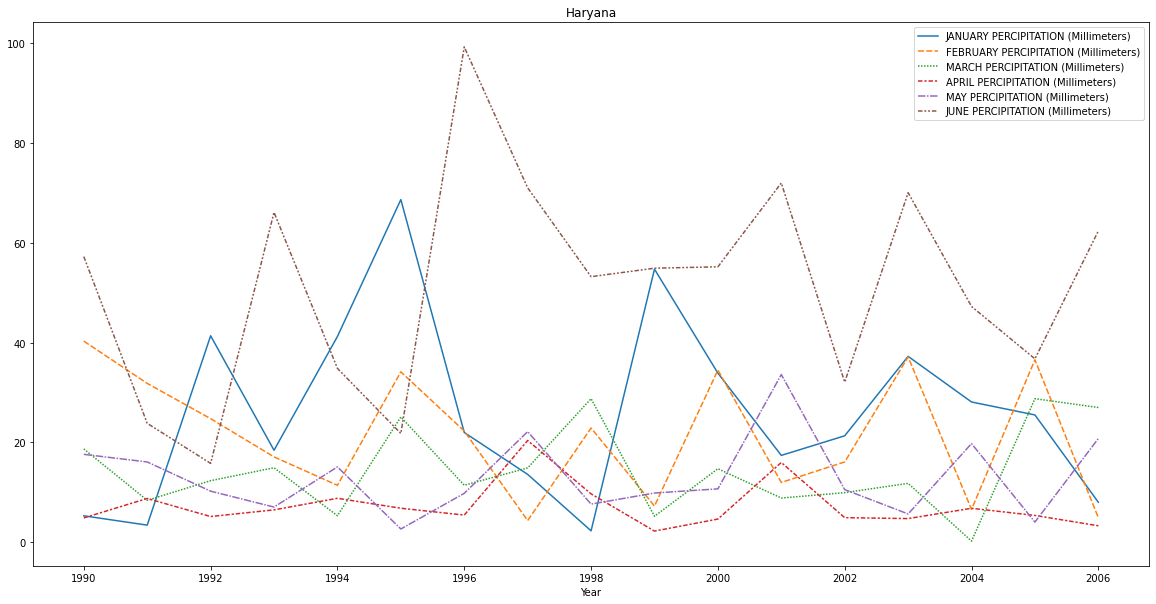

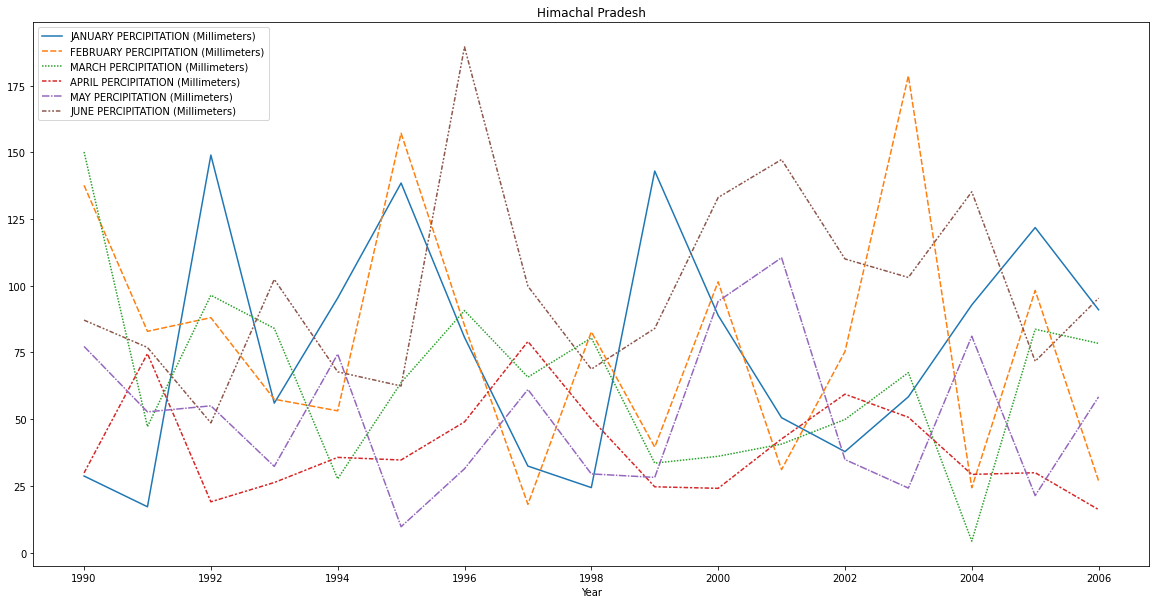

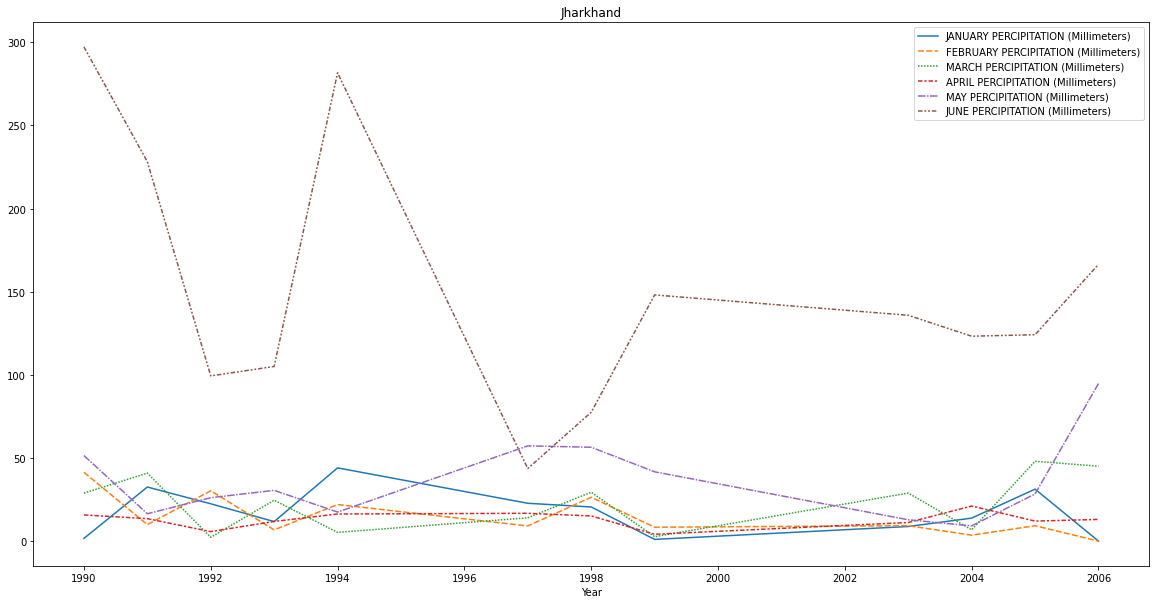

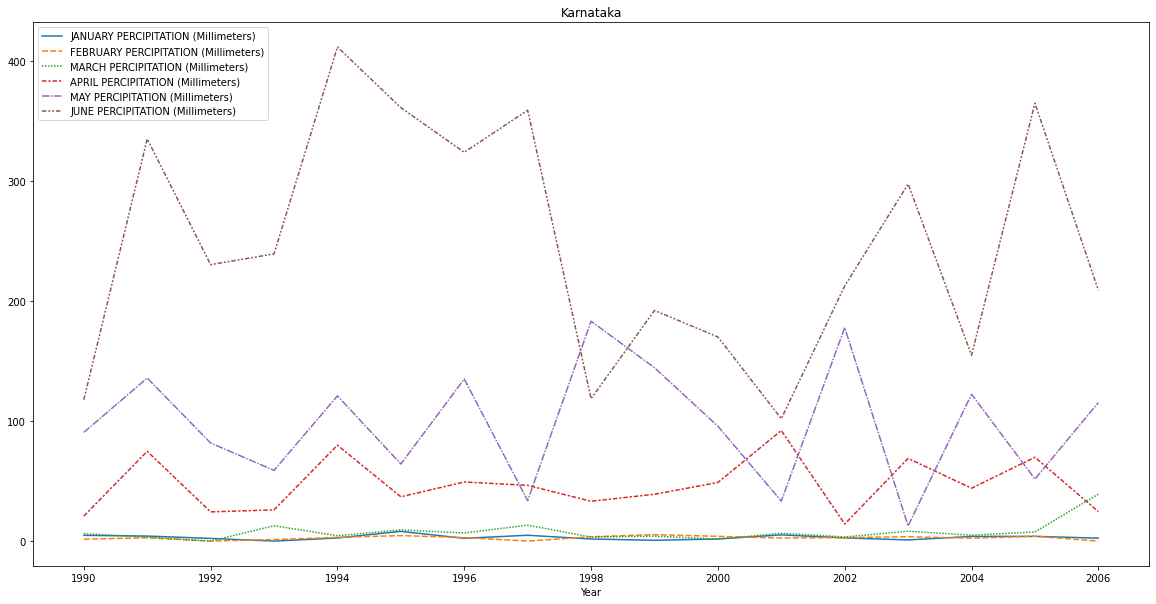

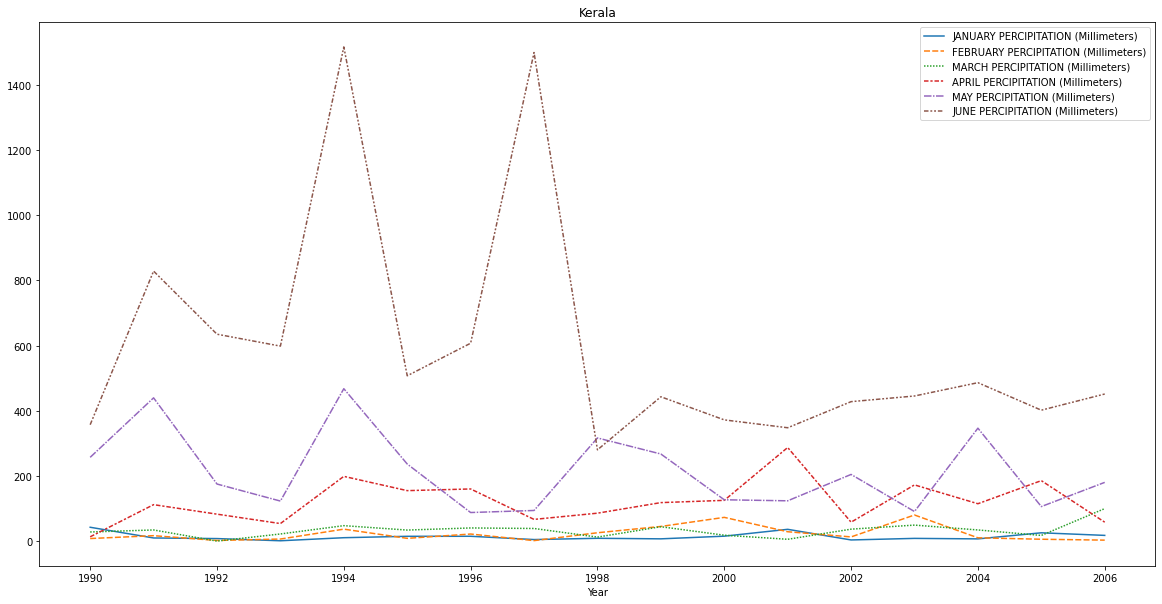

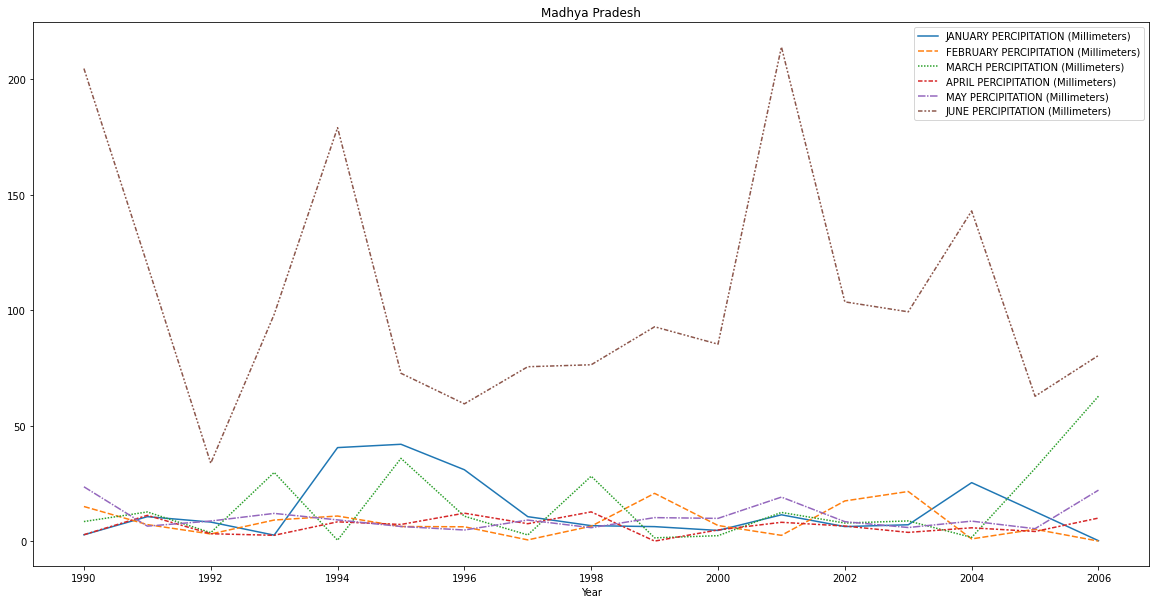

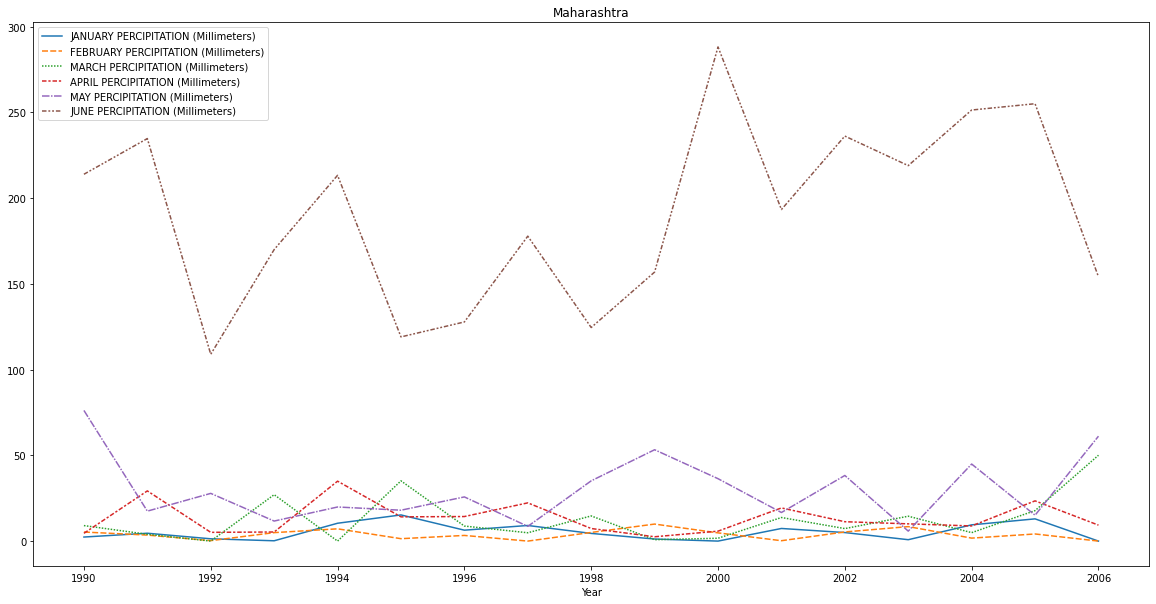

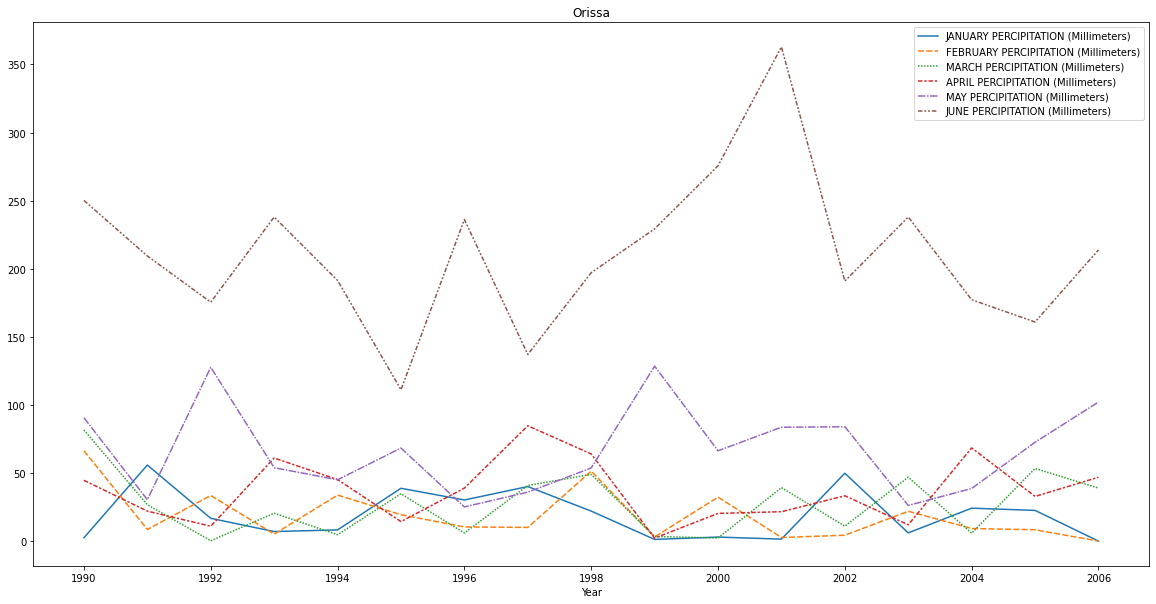

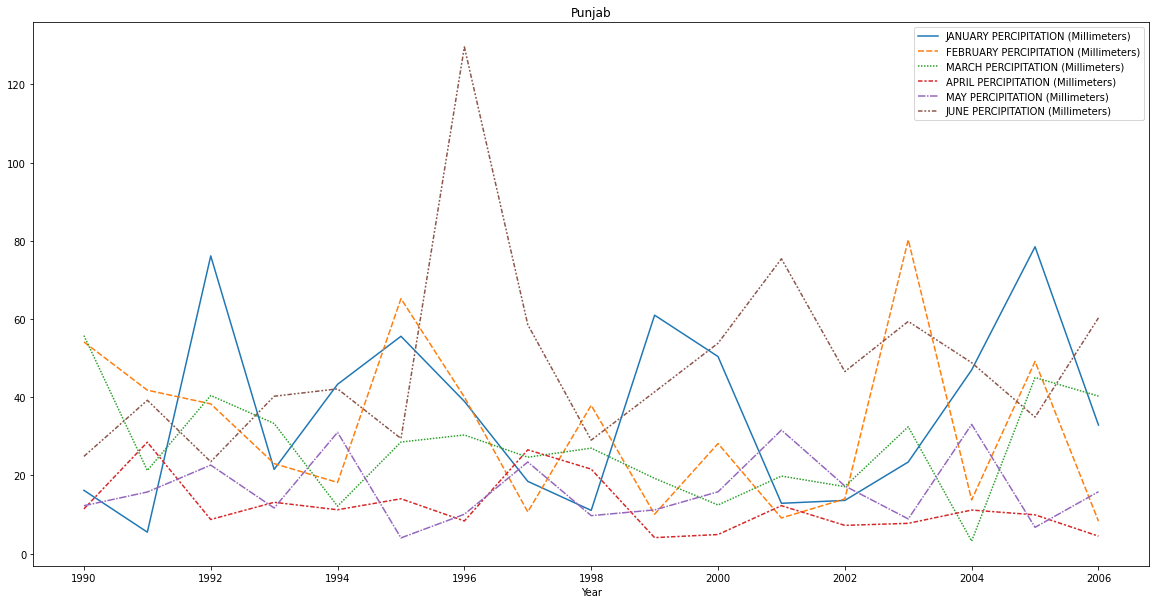

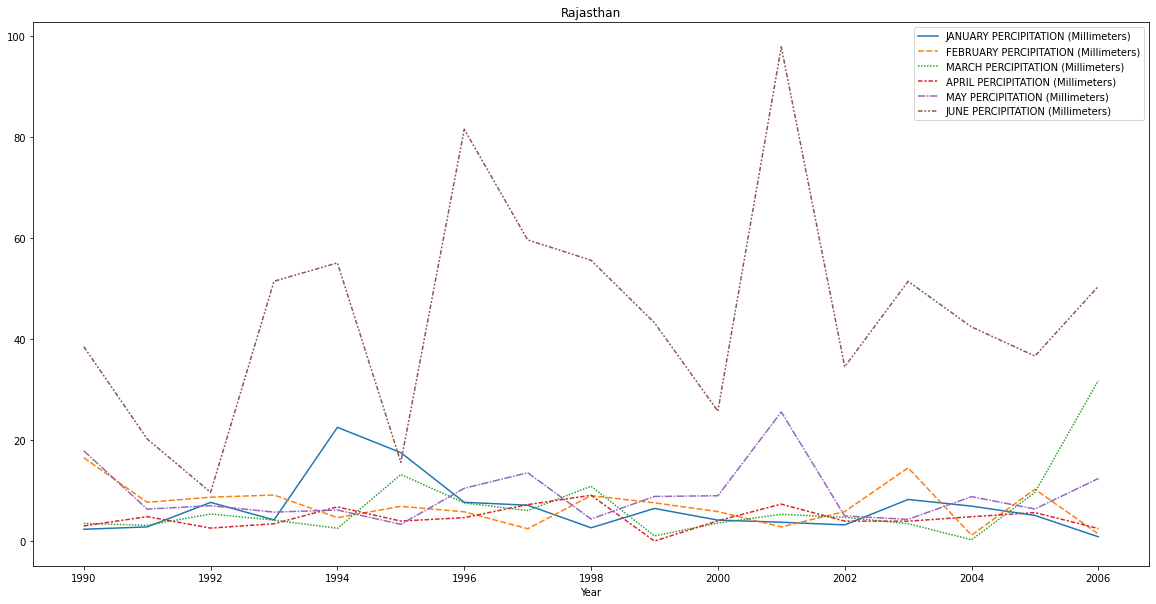

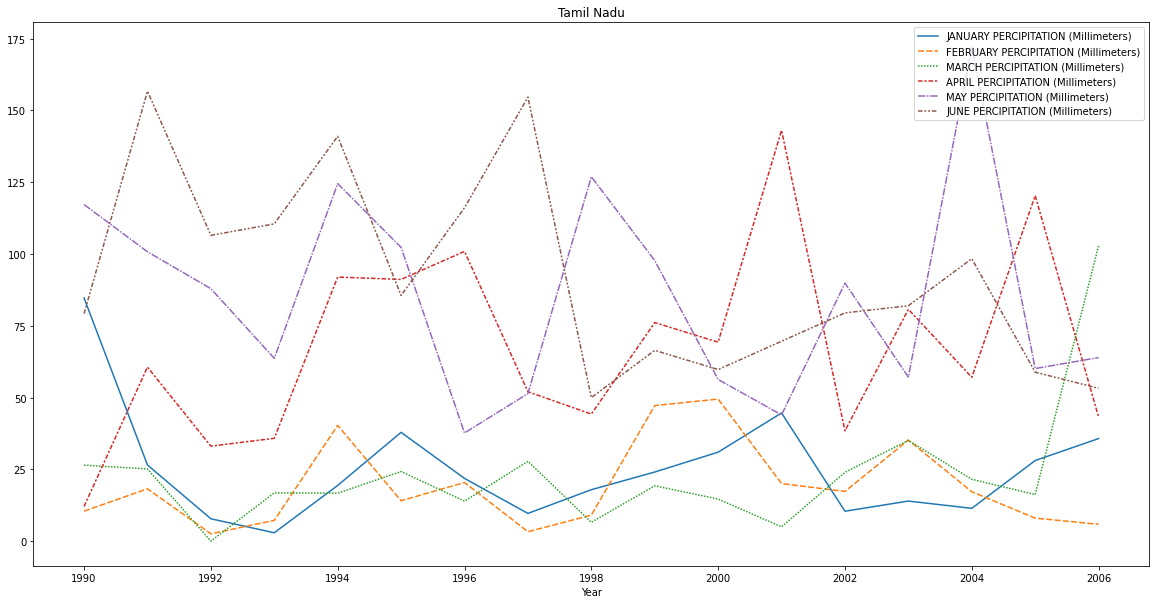

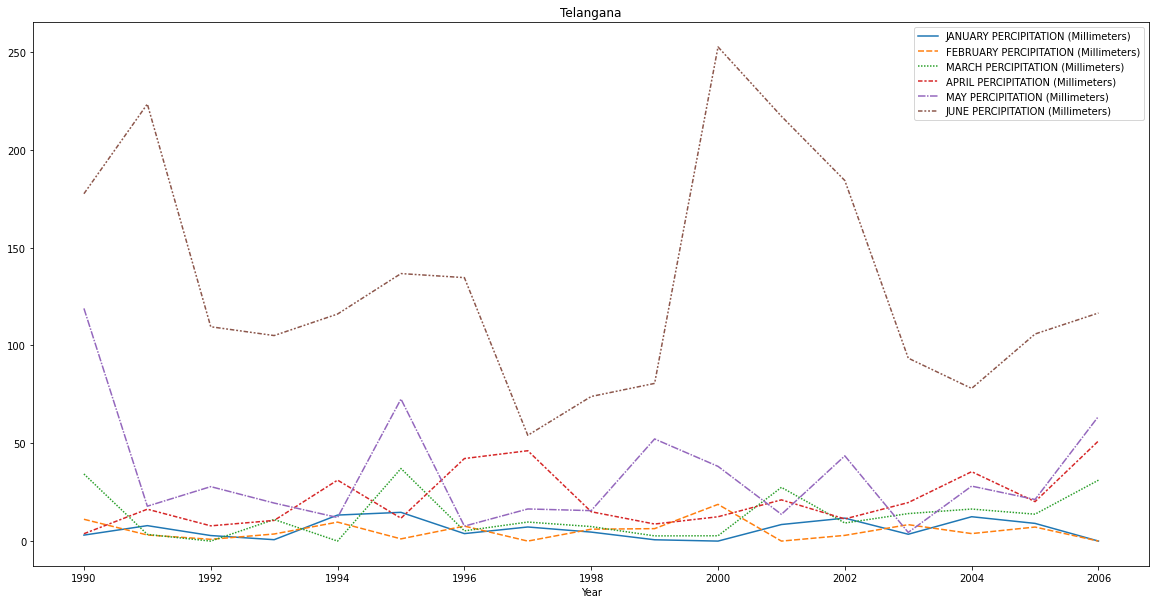

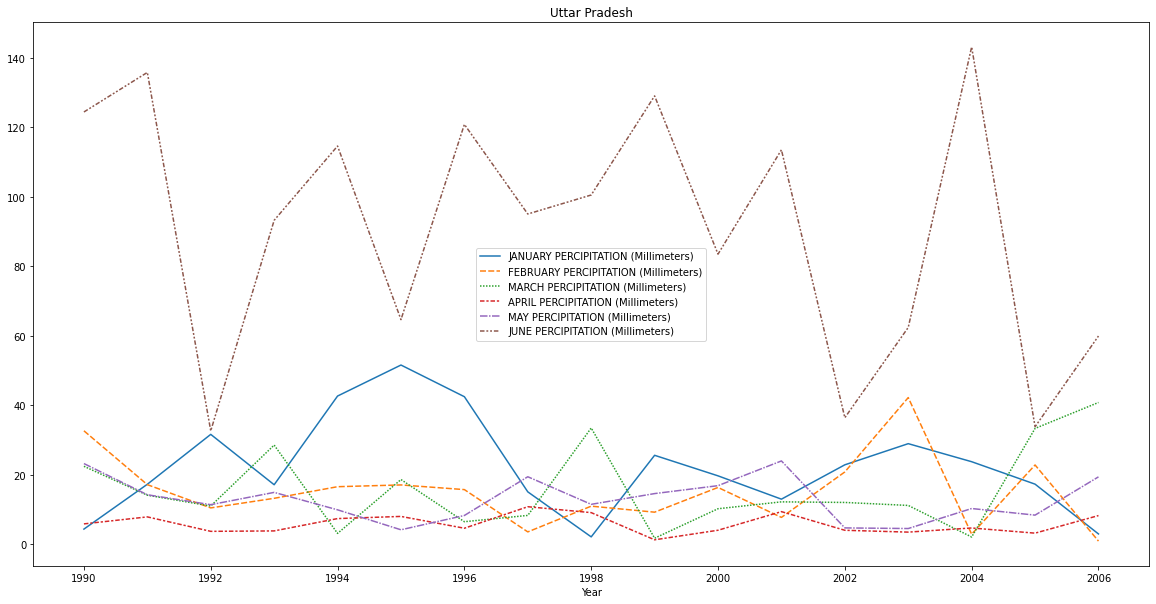

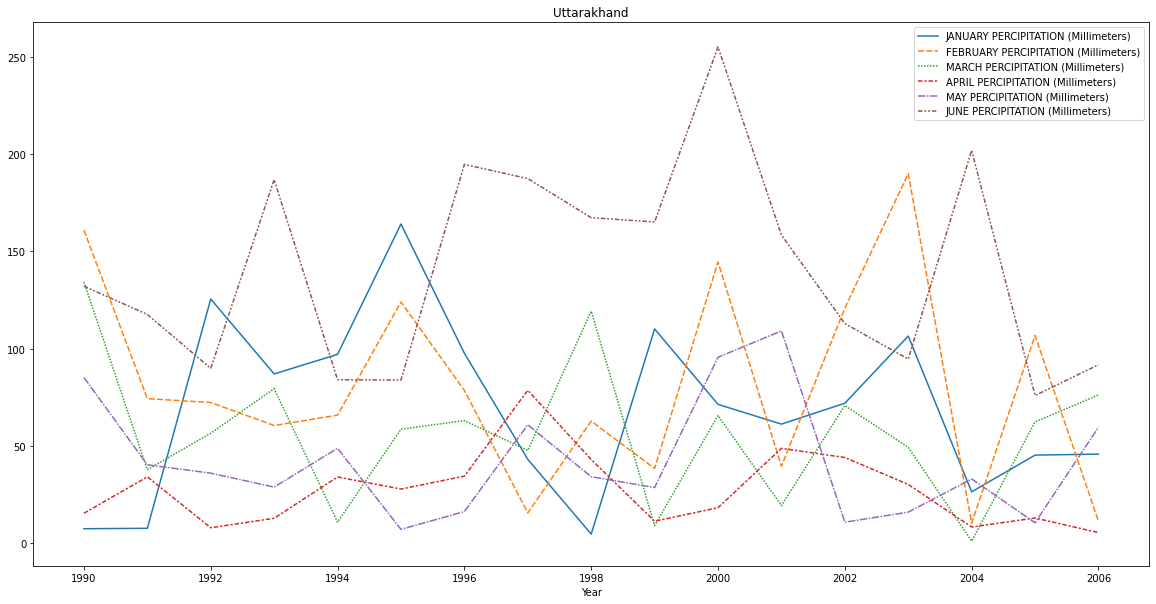

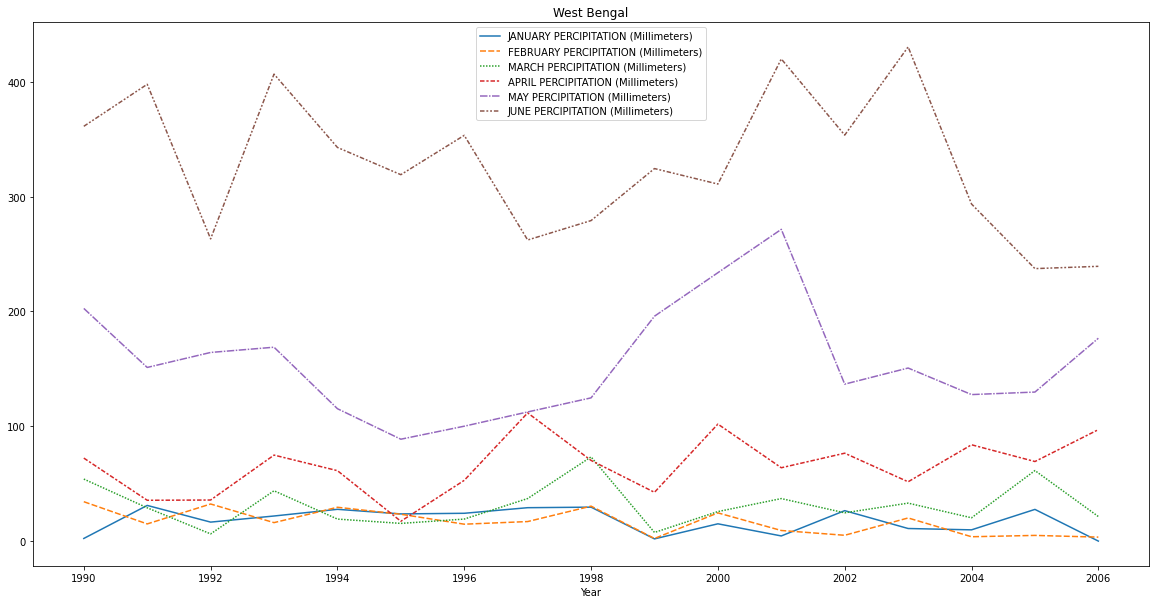

In [17]:
#states=['Andhra Pradesh','Kerala','Haryana','Madhya Pradesh','Uttar Pradesh','Telangana','Punjab']
states=np.unique(data['State Name'].values)
rainfall_states1998_first6months(states,data_fill_forward)

In [18]:
def rainfall_states1998_second6months(states,df):
    for i in states:
        df_state=df.groupby("State Name")
        df_state=df_state.get_group(str(i))
        df_state=df_state.groupby('Year')
        df_state=df_state.mean()
        #data_monthwise_01=df_state.iloc[:,[3,4,5,6,7,8]]
        data_monthwise_02=df_state.iloc[:,[9,10,11,12,13,14]]
        plt.figure(figsize=(20,10))
        plt.title(i)
        sns.lineplot(data=data_monthwise_02)
        plt.show()

In [19]:
#rainfall_states1998_second6months(states,data_fill_forward)

In [20]:
#Frequent unusual rainfall effect the yield of cotton crop
#More amt of rain fall in May and less amt of rain fall in June is observed  for the yr 1998 where yield rate is very less similaryly oct decr and nov incr

In [21]:
#HOW TEMPERATURE EFFECT YIELD OF COTTON

In [22]:
def tempmin(states,df):
    figure,axes=plt.subplots(5,4,sharex=True,figsize=(30,15))
    figure.suptitle("Min Temperatures in state yearwise")
    a=0
    b=0
    for i in states:
        if(b==4):
            a=a+1
            b=0
        df_state=df.groupby('State Name')
        df_state=df_state.get_group(str(i))
        df_state_min=df_state.groupby('Year').min()
        df_state_min=df_state_min.iloc[:,[17,18,19,20,21,22,23,24,24,26,27,28]]
        df_state_min['mean']=df_state_min.mean(axis=1)
        sns.lineplot(ax=axes[a,b],data=df_state_min,x="Year",y='mean')
        #sns.lineplot(ax=axes[a,b],data=data_state_yr,x="Year",y='COTTON PRODUCTION (1000 tons)')
        axes[a][b].set_title(i)
        b=b+1

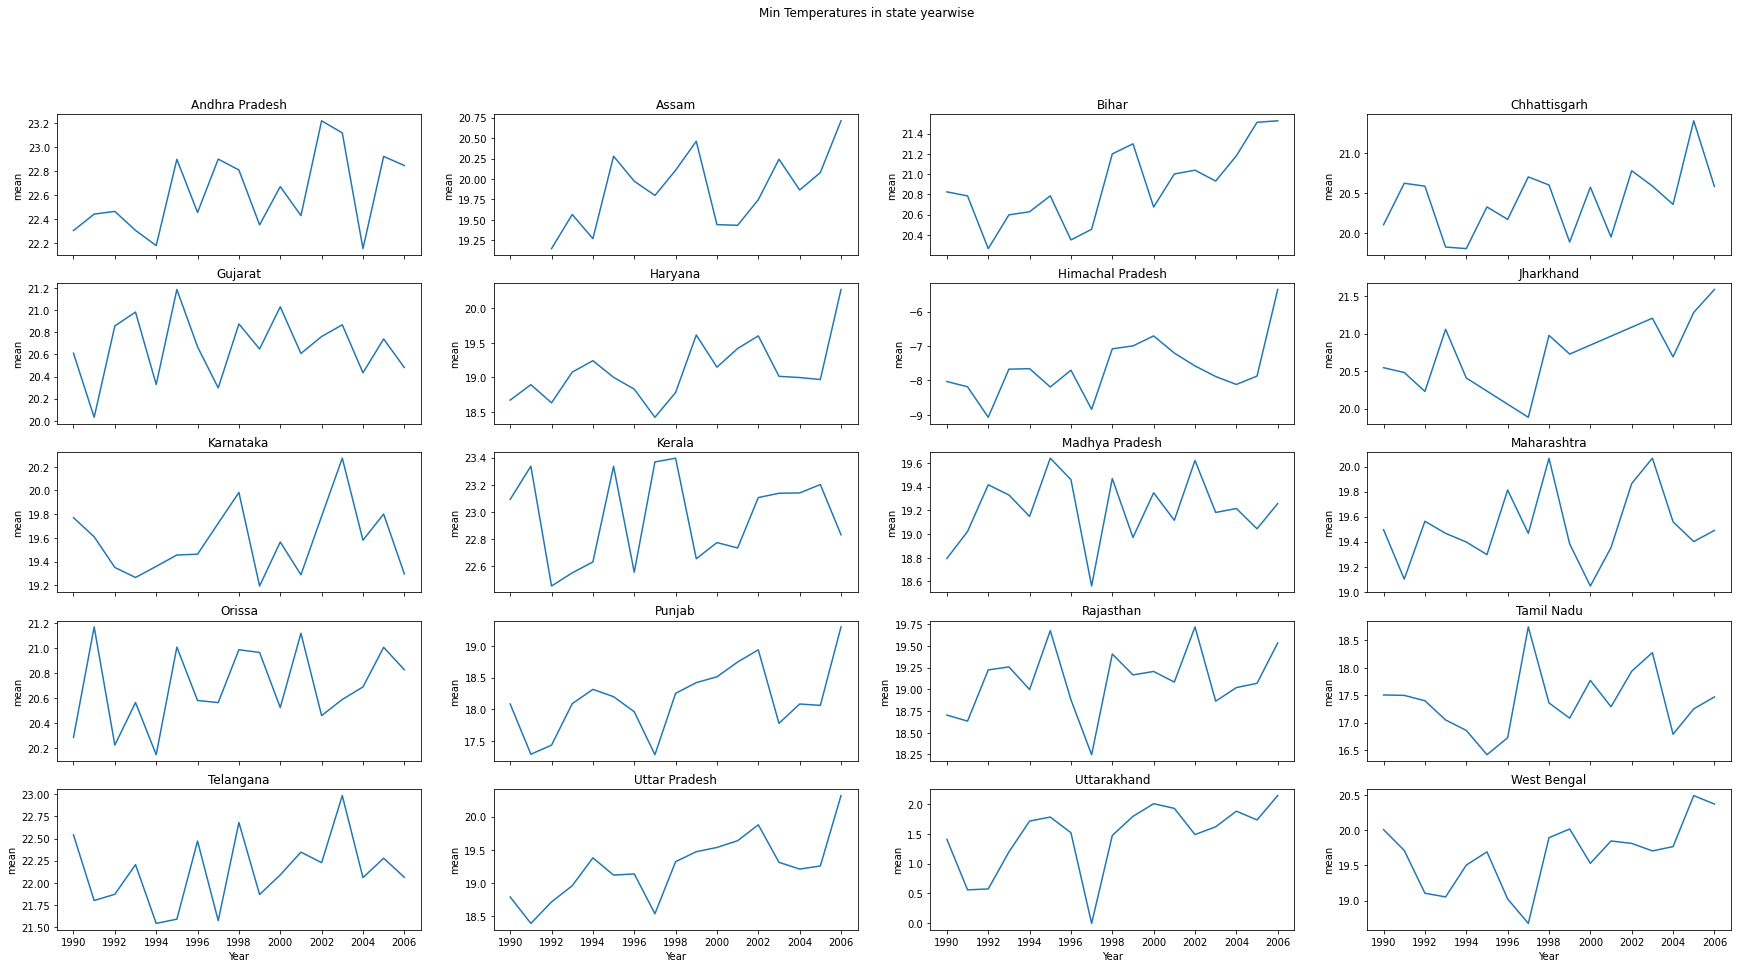

In [23]:
states=np.unique(data['State Name'].values)
tempmin(states,data_fill_forward)

In [24]:
def statewise_yield(df2):
    states=np.unique(df2['State Name'].values)
    df=df2.copy()
    df=df.groupby('State Name')
    figure,axes=plt.subplots(5,4,sharex=True,figsize=(30,15))
    figure.suptitle("Cotton Yield rate in yearwise")
    a=0
    b=0
    for i in states:
        if(b==4):
            a=a+1
            b=0
        data_state=df.get_group(str(i))
        data_state_yr=data_state.groupby('Year').sum()
        sns.lineplot(ax=axes[a,b],data=data_state_yr,x="Year",y='COTTON YIELD (Kg per ha)')
        #sns.lineplot(ax=axes[a,b],data=data_state_yr,x="Year",y='COTTON PRODUCTION (1000 tons)')
        axes[a][b].set_title(i)
        b=b+1

In [25]:
for col in data.columns:
    print(col)

Year
State Name
Dist Name
COTTON AREA (1000 ha)
COTTON PRODUCTION (1000 tons)
COTTON YIELD (Kg per ha)
JANUARY PERCIPITATION (Millimeters)
FEBRUARY PERCIPITATION (Millimeters)
MARCH PERCIPITATION (Millimeters)
APRIL PERCIPITATION (Millimeters)
MAY PERCIPITATION (Millimeters)
JUNE PERCIPITATION (Millimeters)
JULY PERCIPITATION (Millimeters)
AUGUST PERCIPITATION (Millimeters)
SEPTEMBER PERCIPITATION (Millimeters)
OCTOBER PERCIPITATION (Millimeters)
NOVEMBER PERCIPITATION (Millimeters)
DECEMBER PERCIPITATION (Millimeters)
JANUARY MINIMUM (Centigrate)
FEBRUARY MINIMUM (Centigrate)
MARCH MINIMUM (Centigrate)
APRIL MINIMUM (Centigrate)
MAY MINIMUM (Centigrate)
JUNE MINIMUM (Centigrate)
JULY MINIMUM (Centigrate)
AUGUST MINIMUM (Centigrate)
SEPTEMBER MINIMUM (Centigrate)
OCTOBER MINIMUM (Centigrate)
NOVEMBER MINIMUM (Centigrate)
DECEMBER MINIMUM (Centigrate)
JANUARY MAXIMUM (Centigrate)
FEBRUARY MAXIMUM (Centigrate)
MARCH MAXIMUM (Centigrate)
APRIL MAXIMUM (Centigrate)
MAY MAXIMUM (Centigrate)